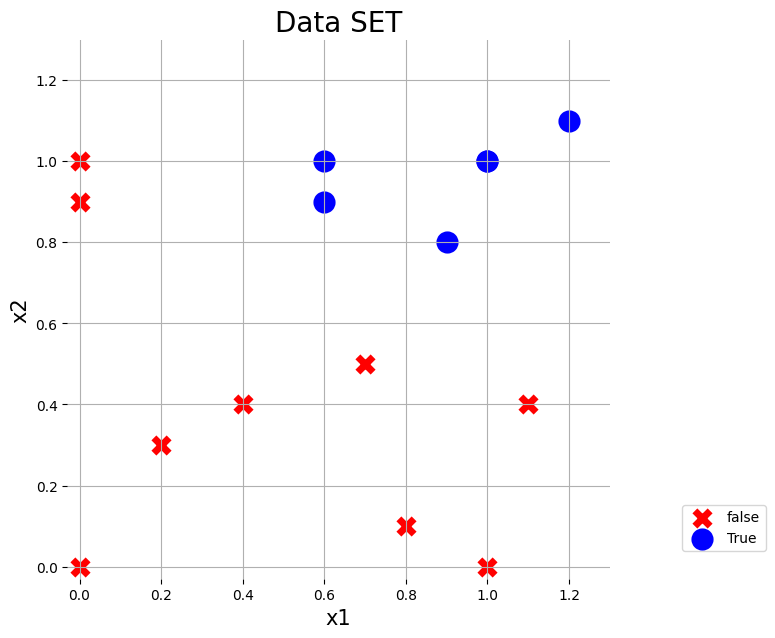

In [1]:
# Este codigo solo muestra los puntos clasifiacados segun su clase
import numpy as np
import matplotlib.pyplot as plt

# atributos     ->   [x1, x2]
individuo = np.array([[1, 0],       # Clase -1 (False)
                      [0, 1],       # Clase -1 (False)
                      [0, 0],       # Clase -1 (False)
                      [1, 1],       # Clase 1 (True)
                      [0.2, 0.3],   # Clase -1 (False)
                      [0.8, 0.1],   # Clase -1 (False)
                      [0.0, 0.9],   # Clase -1 (False)
                      [1.1, 0.4],   # Clase -1 (False)
                      [0.6, 0.9],   # Clase 1 (True)
                      [1.0, 1.0],   # Clase 1 (True)
                      [0.9, 0.8],   # Clase 1 (True)
                      [0.4, 0.4],   # Clase -1 (False)
                      [1.2, 1.1],   # Clase 1 (True)
                      [0.7, 0.5],   # Clase -1 (False) 
                      [0.6, 1],     # Clase -1 (False) 
                              ])
                # 1 : true    -1 : false
clases = np.array([-1, -1, -1, 1,-1, -1, -1, -1, 1, 1, 1, -1, 1, -1,1])

# Gráfica de dispersión (x1, x2)
plt.figure(figsize=(7, 7))
plt.title("Data SET", fontsize=20)
plt.scatter(individuo [clases == -1].T[0], 
            individuo [clases == -1].T[1], 
            marker="x", s=120, color="red",
            linewidths=5, label="false")
plt.scatter(individuo [clases == 1].T[0],
            individuo [clases == 1].T[1], 
            marker="o", s=120, color="blue",
            linewidths=5, label="True")
plt.xlabel("x1", fontsize=15)
plt.ylabel("x2", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((-0.03, 1.3))
plt.ylim((-0.03, 1.3))
plt.grid()
plt.show()

In [2]:
# Este codigo ejecuta las epocas definidas en el while.

# Parámetros iniciales
w1 = 0.5
w2 = -0.5
b = -1
pa = 0.2  # Parámetro de aprendizaje
numEpocas = 10

# Variables para tracking
epocas = 0
sumaErrores = 0
error = []
aciertos = []  # Para comparar con el Perceptrón

while epocas != numEpocas:
    print("\n--- Epoca:", epocas + 1, "---")
    contaSinError = 0  # Contador de aciertos por época
    
    for i in range(individuo.shape[0]):
        print("Iteracion:", i + 1)
        print("num1:", individuo[i, 0], "num2:", individuo[i, 1])
        
        # Paso 1: Calcular la salida lineal (antes de la función escalón)
        y_linear = (w1 * individuo[i, 0]) + (w2 * individuo[i, 1]) + b
        print("Y (lineal):", y_linear)
        
        # Paso 2: Aplicar función escalón (como el Perceptrón)
        y_pred = 1 if y_linear >= 0 else -1
        print("Y (escalón):", y_pred)
        
        # Paso 3: Verificar si la predicción es correcta
        if y_pred == clases[i]:
            print("No actualizo pesos, ni bias")
            contaSinError += 1
        else:
            print("Actualizo pesos y bias")
            # Actualizar pesos usando el error lineal (clases[i] - y_linear)
            w1 += pa * (clases[i] - y_linear) * individuo[i, 0]
            w2 += pa * (clases[i] - y_linear) * individuo[i, 1]
            b += pa * (clases[i] - y_linear)
            print("w1_new:", w1, "w2_new:", w2, "b_new:", b)
            
            # Calcular error cuadrático (para registro)
            sumaErrores += ((clases[i] - y_linear) ** 2) / 2
    
    # Guardar resultados de la época
    epocas += 1
    aciertos.append(contaSinError)
    error.append(sumaErrores)
    print("Época:", epocas, "Aciertos:", contaSinError, "de", len(clases), "SumaErrores:", sumaErrores)
    sumaErrores = 0  # Reiniciar para la próxima época
     
            


--- Epoca: 1 ---
Iteracion: 1
num1: 1.0 num2: 0.0
Y (lineal): -0.5
Y (escalón): -1
No actualizo pesos, ni bias
Iteracion: 2
num1: 0.0 num2: 1.0
Y (lineal): -1.5
Y (escalón): -1
No actualizo pesos, ni bias
Iteracion: 3
num1: 0.0 num2: 0.0
Y (lineal): -1.0
Y (escalón): -1
No actualizo pesos, ni bias
Iteracion: 4
num1: 1.0 num2: 1.0
Y (lineal): -1.0
Y (escalón): -1
Actualizo pesos y bias
w1_new: 0.9 w2_new: -0.09999999999999998 b_new: -0.6
Iteracion: 5
num1: 0.2 num2: 0.3
Y (lineal): -0.44999999999999996
Y (escalón): -1
No actualizo pesos, ni bias
Iteracion: 6
num1: 0.8 num2: 0.1
Y (lineal): 0.1100000000000001
Y (escalón): 1
Actualizo pesos y bias
w1_new: 0.7223999999999999 w2_new: -0.12219999999999998 b_new: -0.8220000000000001
Iteracion: 7
num1: 0.0 num2: 0.9
Y (lineal): -0.93198
Y (escalón): -1
No actualizo pesos, ni bias
Iteracion: 8
num1: 1.1 num2: 0.4
Y (lineal): -0.07624000000000009
Y (escalón): -1
No actualizo pesos, ni bias
Iteracion: 9
num1: 0.6 num2: 0.9
Y (lineal): -0.4985400

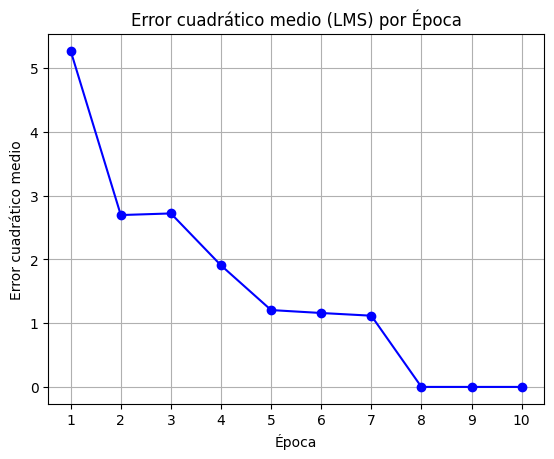

In [3]:
# Crear la gráfica de el error cuadrático medio por epoca
epocas = range(1, len(error) + 1)
plt.plot(epocas, error, marker='o', linestyle='-', color='b')  # Línea con puntos marcados
plt.title('Error cuadrático medio (LMS) por Época')  # Título de la gráfica
plt.xlabel('Época')  # Etiqueta del eje X
plt.ylabel('Error cuadrático medio')  # Etiqueta del eje Y
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
plt.xticks(epocas)  # Asegurar que las épocas se muestren correctamente en el eje X
plt.show()  # Mostrar la gráfica          

Ingrese x1 con un valor entre -1 y 1:  0.5
Ingrese x2 con un valor entre -1 y 1:  1


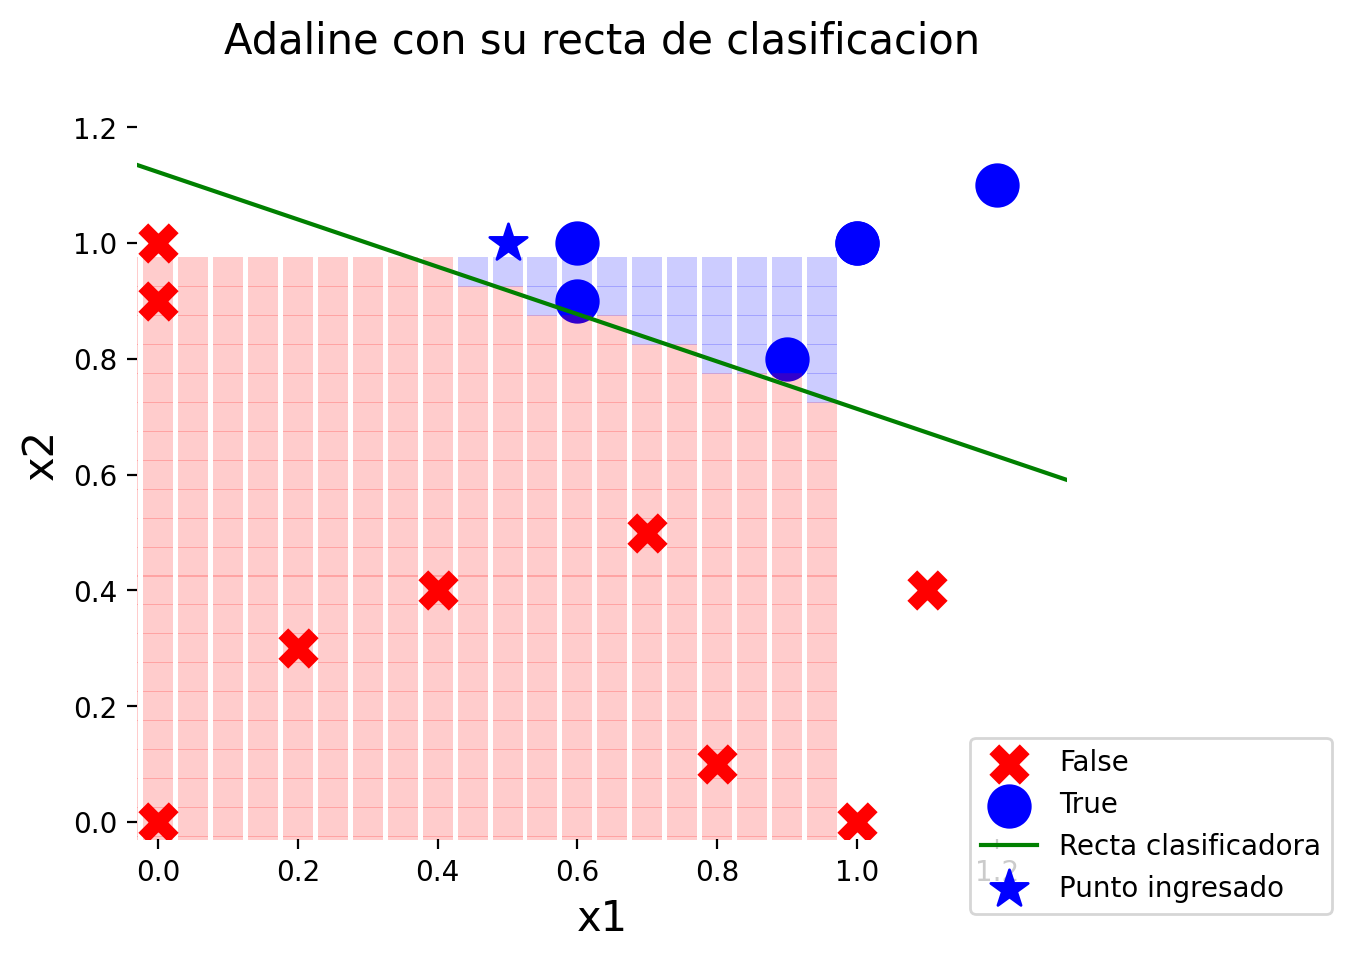

In [6]:
def validar_entrada(mensaje):
    while True:
        try:
            valor = float(input(mensaje))
            if -1 <= valor <= 1:
                return valor
            else:
                print("Error: El valor debe estar entre -1 y 1. Intente nuevamente.")
        except ValueError:
            print("Error: Ingrese un número válido.")

# Datos de ejemplo (simulando tus datos)
# atributos     ->   [x1, x2]
individuo = np.array([[1, 0],       # Clase -1 (False)
                      [0, 1],       # Clase -1 (False)
                      [0, 0],       # Clase -1 (False)
                      [1, 1],       # Clase 1 (True)
                      [0.2, 0.3],   # Clase -1 (False)
                      [0.8, 0.1],   # Clase -1 (False)
                      [0.0, 0.9],   # Clase -1 (False)
                      [1.1, 0.4],   # Clase -1 (False)
                      [0.6, 0.9],   # Clase 1 (True)
                      [1.0, 1.0],   # Clase 1 (True)
                      [0.9, 0.8],   # Clase 1 (True)
                      [0.4, 0.4],   # Clase -1 (False)
                      [1.2, 1.1],   # Clase 1 (True)
                      [0.7, 0.5],   # Clase -1 (False) 
                      [0.6, 1],     # Clase -1 (False) 
                              ])
                # 1 : true    -1 : false
clases = np.array([-1, -1, -1, 1,-1, -1, -1, -1, 1, 1, 1, -1, 1, -1,1])

# Pesos y sesgo (simulando tus valores)
#w1, w2, b = 1.0, 1.0, 0.0  # Ajusta estos valores según tu modelo

# Crear la figura
plt.figure(figsize=(6, 5), dpi=200)
plt.title("Adaline con su recta de clasificacion", fontsize=15)

# Graficar los puntos de entrada
plt.scatter(individuo[clases == -1].T[0], 
            individuo[clases == -1].T[1], 
            marker="x", s=120, color="red",
            linewidths=5, label="False")
plt.scatter(individuo[clases == 1].T[0],
            individuo[clases == 1].T[1], 
            marker="o", s=120, color="blue",
            linewidths=5, label="True")

# Generar y graficar la región de decisión
for x1 in np.arange(-1, 1, 0.05):
    for x2 in np.arange(-1, 1, 0.05):
        # Calcular el valor de y
        y = (w1 * x1) + (w2 * x2) + b
        
        # Función de activación
        if y >= 0:
            color = "blue"  # Clase 1
        else:
            color = "red"   # Clase -1
        
        # Graficar el punto
        plt.scatter(x1, x2, marker="s", s=110,
                    color=color, alpha=0.2, linewidths=0)

# Calcular recta 
r1 = (-(b/w1)) * np.array([1, 0])  # Punto donde x2 = 0
r2 = (-(b/w2)) * np.array([0, 1])  # Punto donde x1 = 0

# Graficar la recta
plt.axline((r1[0], r1[1]), (r2[0], r2[1]), color="green", label="Recta clasificadora")

# Solicitar valores de x1 y x2 al usuario
x1 = validar_entrada("Ingrese x1 con un valor entre -1 y 1: ")
x2 = validar_entrada("Ingrese x2 con un valor entre -1 y 1: ")

# Determinar la clase del punto ingresado
y = (w1 * x1) + (w2 * x2) + b
if y >= 0:
    color = "blue"  # Clase 1
else:
    color = "red"   # Clase -1

# Graficar el punto ingresado
plt.scatter(x1, x2, marker="*", s=200, color=color, label="Punto ingresado")

# Configuraciones adicionales del gráfico
plt.xlabel("x1", fontsize=15)
plt.ylabel("x2", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((-0.03, 1.3))
plt.ylim((-0.03, 1.3))
plt.show()